In [1]:
import os
import json
import random
import requests
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
import base64


In [2]:
API_KEY = "e9da5326e2713d0412e7283c2588783d96237a5c4c76ac109423e53115f0506f"
API_URL = "https://api.together.xyz/v1/chat/completions"
MODEL = "meta-llama/Meta-Llama-3-8B-Instruct-Lite"

DATASET_PATH = "final_dataset.jsonl"
IMAGE_DIR = r"C:\\Users\\AARUSHI TANDON\\Downloads\\all_images (1)"


In [3]:
# ========== Load Dataset ==========
entries = []
with open(DATASET_PATH, "r") as f:
    for line in f:
        entries.append(json.loads(line))

print(f" Loaded {len(entries)} dataset entries")



 Loaded 250 dataset entries


In [4]:
entries = []
with open(DATASET_PATH, "r") as f:
    for line in f:
        entries.append(json.loads(line))

print(f"✅ Loaded {len(entries)} dataset entries")


✅ Loaded 250 dataset entries


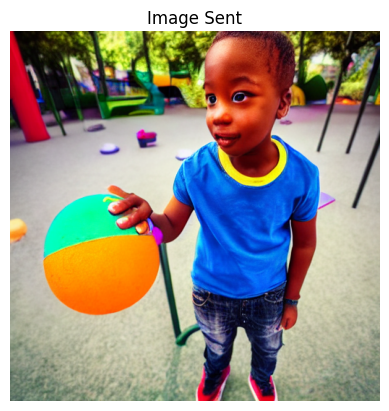

In [18]:
# ========== Pick a Random Entry ==========
sample = random.choice(entries)
img_path = os.path.join(IMAGE_DIR, sample["image"])

# ========== Display Image ==========
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.title("Image Sent")
plt.show()


In [6]:
# ---- Build Prompt using Text-Only (Option B style) ----
caption = sample["caption"]
objects = ", ".join(sample["labels"]["objects"])
relation = sample["labels"]["relation"]
prompt = f"""
Image Description: {caption}
Objects detected: {objects}
Relation between objects: {relation}

Answer the following:
1. What is happening in this scene?
2. Is this situation normal or suspicious?
3. What actions might follow?
"""


In [92]:
# ---- API Call ----
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

payload = {
    "model": MODEL,
    "max_tokens": 512,
    "temperature": 0.7,
    "messages": [
        {
            "role": "user",
            "content": prompt
        }
    ]
}

response = requests.post(API_URL, headers=headers, json=payload)


In [97]:
if response.ok:
    result = response.json()
    content = result['choices'][0]['message']['content']
    print("\n Together.ai Scene Reasoning (Text-Only):\n")
    print(content)
else:
    print("❌ Error from Together.ai:", response.status_code)
    print(response.text)



 Together.ai Scene Reasoning (Text-Only):

Based on the image description and objects detected, here are my answers:

1. What is happening in this scene?

In this scene, two women are taking a picture together. They might be friends, family members, or colleagues, and they are likely capturing a moment or memory to cherish.

2. Is this situation normal or suspicious?

This situation appears to be normal, as it is a common and innocent activity that people engage in to create memories and document special moments. There is no indication of anything unusual or suspicious happening in this scene.

3. What actions might follow?

Following this scene, the two women might:

* Review the photo they just took to ensure it turned out well.
* Share the photo on social media or send it to each other as a memento.
* Discuss the context of the photo, such as the event or occasion they were attending.
* Plan another photo opportunity or activity together.
* Continue their activities or event, as if